In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tabulate

#from sklearn import datasets
#from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.pipeline import make_pipeline

#для расчета ROC-кривой
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

#from sklearn.metrics import accuracy_score #доля правильных ответов в классификации
#from sklearn.metrics import mean_squared_error

**Загрузим датасет и проверим на наличие нулевых значений.**

In [2]:
data=pd.read_csv('C:/Users/Лина/Downloads/Обучение/Машинное обучение/Оценка точности модели, переобучение, регуляризация/ДЗ/athletes.csv', delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [3]:
print('Для height пустых строк {}'.format( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк {}'.format( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк {}'.format( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе {}'.format( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [4]:
# обнуляем ячейки с отсутствием данных
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


**Создаем модель машинного обучения логической регрессии. Запускаем обучение.**

In [6]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'height', 'weight', 'sport', 'sex' ] ]

# столбец sport является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'sport' ] )

# столбец sex является целевой переменной, удаляем его из X
del X['sex']
X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
le.fit( data['sex'] )

LabelEncoder()

In [9]:
le.classes_

array(['female', 'male'], dtype=object)

In [10]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
len(X_train) + len(X_test) == len(X)

True

In [12]:
model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

In [13]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[0.88795551, 0.11204449],
       [0.87128244, 0.12871756],
       [0.96182035, 0.03817965],
       ...,
       [0.00214871, 0.99785129],
       [0.19033855, 0.80966145],
       [0.08961287, 0.91038713]])

**Построим ROC-кривую (Receiver Operating Characteristic) с помощью библиотеки sklearn..**

In [14]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions)

for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, 2)
(0.20710659898477157, 0.8239258635214828, 1)
(1.0, 1.0, 0)


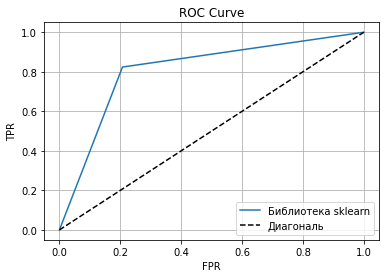

In [15]:
plt.plot(fpr, tpr, label = 'Библиотека sklearn')

# Добавляем диагональ под 45 градусов
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label='Диагональ')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid()

**Выяислим значение ROC-AUC метрики.**

In [16]:
roc_auc_score(y_test, predictions)

0.8084096322683556

**Рассчитаем метрики TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

In [17]:
predictions = predictions[:100]
y_test = y_test[:100]
#y_test = y_test.to_numpy()

def check(X_test, y_test, treshold):
        
    tp1 = 0
    fp1 = 0
    tn1 = 0
    fn1 = 0
    
    pr1 = []
    re1 = []
    fpr1 = []
    tpr1 = []
    
    for predicted_prob, actual in zip( predictions, y_test ):
        if predicted_prob >= treshold:
            predicted = 1
        else:
            predicted = 0
            
        if predicted == 1:
            if actual == 1:
                tp1 += 1
            else:
                fp1 += 1
        else:
            if actual == 1:
                fn1 += 1
            else:
                tn1 += 1
                
        pr1.append(tp1 / (tp1 + fp1 + 1e-09))
        re1.append(tp1 / (tp1 + fn1 + 1e-09))
        tpr1.append(tp1/(tn1 + fp1))
        fpr1.append(fp1/(tn1 + fp1))
        
        
    return pr1, re1, fpr1, tpr1

In [18]:
pr1, re1, fpr1, tpr1 = check(predictions, y_test, 1)
print(pr1, re1, fpr1, tpr1)

[0.0, 0.0, 0.0, 0.0, 0.9999999989999999, 0.9999999989999999, 0.9999999995, 0.9999999996666666, 0.7499999998125, 0.79999999984, 0.79999999984, 0.8333333331944445, 0.8571428570204082, 0.8571428570204082, 0.874999999890625, 0.8888888887901234, 0.79999999992, 0.79999999992, 0.79999999992, 0.79999999992, 0.79999999992, 0.8181818181074381, 0.8333333332638889, 0.8461538460887574, 0.8571428570816326, 0.8571428570816326, 0.8571428570816326, 0.8571428570816326, 0.8666666666088889, 0.8666666666088889, 0.8749999999453125, 0.8749999999453125, 0.8823529411245675, 0.8823529411245675, 0.8888888888395061, 0.8947368420581717, 0.8947368420581717, 0.899999999955, 0.9047619047188209, 0.9090909090495868, 0.913043478221172, 0.9166666666284722, 0.9199999999632, 0.9199999999632, 0.8846153845813609, 0.8846153845813609, 0.8888888888559671, 0.8928571428252551, 0.8965517241070154, 0.89999999997, 0.89999999997, 0.9032258064224766, 0.9032258064224766, 0.9062499999716798, 0.9062499999716798, 0.909090909063361, 0.9117

**Построим ROC-кривую с помощью вычисленных вручную метрик FRP и TRP. Объединим графики метрик FRP и TRP рассчитанных вручную и с помощью библиотеки sklearn.**

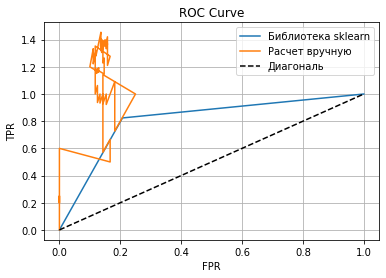

In [19]:
plt.plot(fpr, tpr, label = 'Библиотека sklearn')
plt.plot(fpr1, tpr1, label = 'Расчет вручную')

# Добавляем диагональ под 45 градусов
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label='Диагональ')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid()


**Построим график Precision-Recall, используя показатели TP, FP и FN, рассчитанные вручную.**

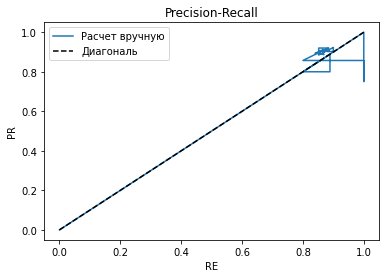

In [22]:
plt.plot(re1, pr1, label = 'Расчет вручную')

# Добавляем диагональ под 45 градусов
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label='Диагональ')

plt.legend()
plt.xlabel('RE')
plt.ylabel('PR')
plt.title('Precision-Recall')
plt.grid()
plt.grid()

**Вычислим значение ROC-AUC метрики, используя показатели TPR и FPR, рассчитанные вручную.**

In [23]:
auc(fpr1, tpr1)

ValueError: x is neither increasing nor decreasing : [0.         0.         0.         0.         0.         0.
 0.         0.         0.16666667 0.16666667 0.14285714 0.14285714
 0.14285714 0.14285714 0.14285714 0.14285714 0.25       0.22222222
 0.2        0.18181818 0.18181818 0.18181818 0.18181818 0.18181818
 0.18181818 0.16666667 0.16666667 0.15384615 0.15384615 0.14285714
 0.14285714 0.13333333 0.13333333 0.125      0.125      0.125
 0.11764706 0.11764706 0.11764706 0.11764706 0.11764706 0.11764706
 0.11764706 0.11764706 0.16666667 0.15789474 0.15789474 0.15789474
 0.15789474 0.15789474 0.15       0.15       0.14285714 0.14285714
 0.13636364 0.13636364 0.13636364 0.13636364 0.13043478 0.125
 0.12       0.12       0.11538462 0.11111111 0.11111111 0.11111111
 0.11111111 0.10714286 0.10344828 0.1        0.12903226 0.12903226
 0.12903226 0.125      0.125      0.12121212 0.12121212 0.12121212
 0.14705882 0.14705882 0.14705882 0.14705882 0.14705882 0.14705882
 0.14705882 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.13888889 0.13888889 0.13888889 0.13888889 0.13513514 0.13513514
 0.13513514 0.15789474 0.15384615 0.15384615].

**Выводы.**

**1 - Как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?**
*Если линия ROC-кривой проходит близко к диагонали, это указывает на низкую эффективность модели. При этом более быстрый подъем кривой вверх указывает на лучшую производительность модели. При переобучении модели, линия ROC-кривой может находиться ниже диагонали.*

*Так как для нашей модели линия ROC-кривой находится выше диагонали и имеет большую скорость нарастания, можно сделать вывод, что она эффективна и не переобучена.*

*Площадь под ROC-кривой, рассчитанной "вручную" рассчитать не удается, так как она пересекает сама себя.*

**2 - Может ли ROC-кривая проходить ниже диагонали?**
*На основании полученных графиков, можно сделать вывод, что ROC-кривая не может проходить ниже диагонали, если она не переобучена.*